In [8]:
import numpy as np

def backfill_nan(data):
    """
    Backfills NaN values in a 1D NumPy array using their neighboring values.
    """
    # Ensure the input is a NumPy array
    data = np.asarray(data)
    
    # Get the indices of the NaN values
    nan_indices = np.where(np.isnan(data))[0]
    
    # Iterate over the NaN indices and replace with the next non-NaN value
    for i in nan_indices:
        if i < len(data) - 1:
            # Find the next non-NaN value
            next_value = data[i+1:][~np.isnan(data[i+1:])][0]
            data[i] = next_value
    
    return data


Get Y for Data 1

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/Users/cu135/bayesian_stats_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

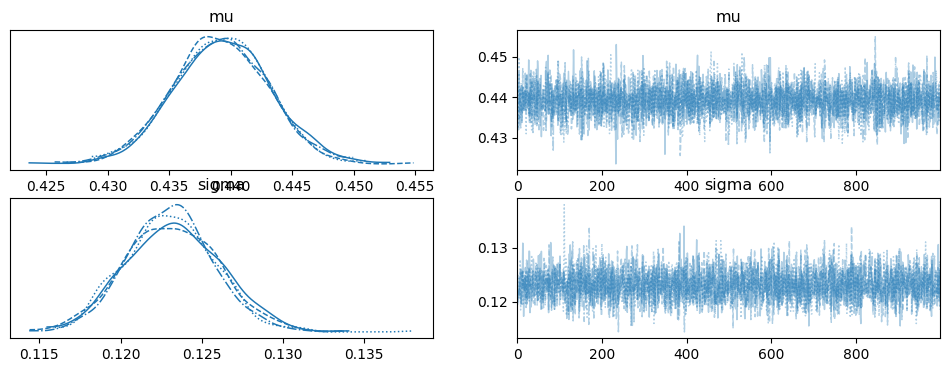

In [32]:
import numpy as np
import pymc as pm
import arviz as az

# Assuming 'data' is your observed distribution of differences between bootstrapped correlations
data = np.loadtxt('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/3_cohort_delta_r/andy_similarity_test/bayes_old/bootstrap_correlations_Toronto.txt')
# Define the Bayesian model
with pm.Model() as model1:
    mu = pm.Uniform('mu', lower=-1, upper=1)  # Flat prior over a reasonable range

    # Prior for the standard deviation (sigma)
    sigma = pm.HalfNormal('sigma', .2)  # Half-normal prior for sigma

    # Likelihood (observed data)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    
    # Sample from the posterior
    idata1 = pm.sample(1000, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

az.plot_trace(idata1)

Get Y For Data 2

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [mu, sigma]


/Users/cu135/bayesian_stats_env/lib/python3.12/site-packages/rich/live.py:231: UserWarning: install "ipywidgets" 
for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 1 seconds.


array([[<Axes: title={'center': 'mu'}>, <Axes: title={'center': 'mu'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

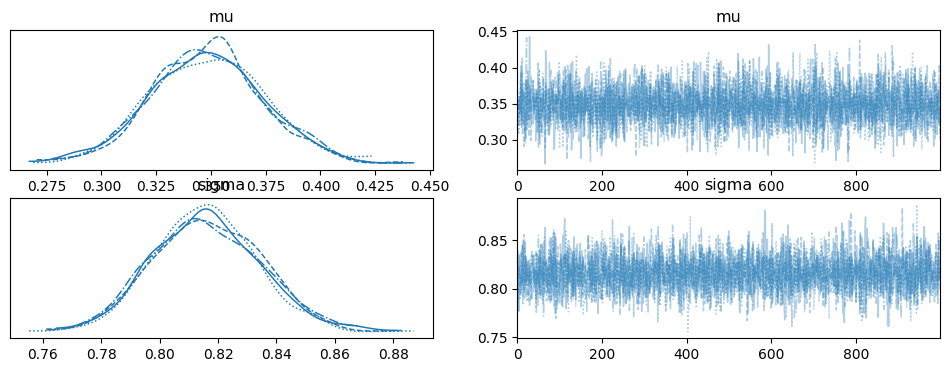

In [36]:
import numpy as np
import pymc as pm
import arviz as az

# Assuming 'data' is your observed distribution of differences between bootstrapped correlations
data = np.loadtxt('/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/3_cohort_delta_r/andy_similarity_test/bayes_old/bootstrap_correlations_Wurzburg.txt')
data = backfill_nan(data)
# Define the Bayesian model
with pm.Model() as model2:
    # Prior for the mean difference (mu)
    mu = pm.Uniform('mu', lower=-1, upper=1)  # Flat prior over a reasonable range

    # Prior for the standard deviation (sigma)
    sigma = pm.HalfNormal('sigma', .2)  # Half-normal prior for sigma

    # Likelihood (observed data)
    y = pm.Normal('y', mu=mu, sigma=sigma, observed=data)
    
    # Sample from the posterior
    idata2 = pm.sample(1000, return_inferencedata=True, idata_kwargs={"log_likelihood": True})

az.plot_trace(idata2)

Get Likelihoods

In [37]:
# Calculate the log likelihood for each model
log_likelihood1 = idata1['log_likelihood'].mean()
log_likelihood2 = idata2['log_likelihood'].mean()

# Convert log likelihoods to likelihoods
BF = np.exp(log_likelihood1 - log_likelihood2)
print("BF: ", BF)


BF:  <xarray.Dataset> Size: 8B
Dimensions:  ()
Data variables:
    y        float64 8B 6.687
